In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import graphviz

In [2]:
usData = pd.read_csv('../Data/Youtube/cleaned_us.csv')
usData.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


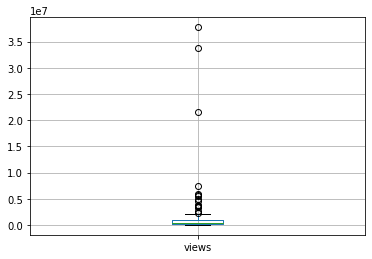

In [3]:
usData[usData.trending_date=="17.30.11"].boxplot(column='views')

In [4]:
usDataDates = usData.groupby("trending_date")
usDataDates.get_group('17.14.11').video_id.value_counts()

_dhneCO4YEE    1
x8eLIJAM58M    1
x9mh-SwSKas    1
w0XYVssCKjw    1
YVfyYrEmzgM    1
              ..
Eg_kW5fw6qU    1
fIQ2Ty2OL34    1
YlvCVbfS9M0    1
ozkqm2ifMw8    1
oB3SAI2oCqk    1
Name: video_id, Length: 200, dtype: int64

This means that this dataset has the top 200 trending videos (Changing the date leads to the same number)

In [5]:
usDataDates.get_group('17.15.11').video_id.value_counts()

kqmhCaF5_44    1
815lSYphlbw    1
Y9nDagqKL7Q    1
c-3JxzN2u34    1
dQvIbulWCM4    1
              ..
EJu_wPGFTw0    1
d380meD0W0M    1
kWIzjMWmuYk    1
Eg_kW5fw6qU    1
i-LCORFB860    1
Name: video_id, Length: 200, dtype: int64

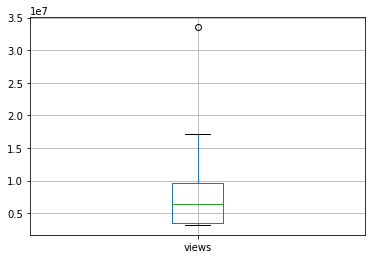

In [6]:
# reduce the amount to the top 10 to actually glean information from the graph
usDataDates.get_group('17.14.11').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

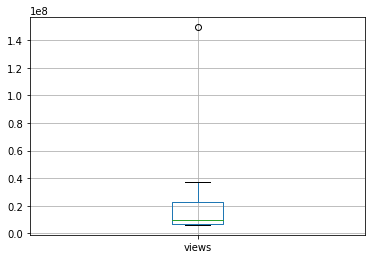

In [7]:
usDataDates.get_group('17.14.12').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

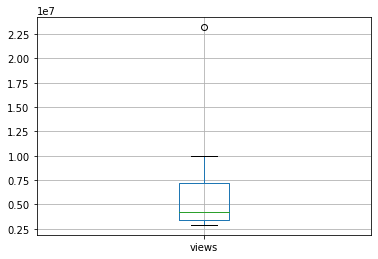

In [8]:
usDataDates.get_group('18.14.01').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

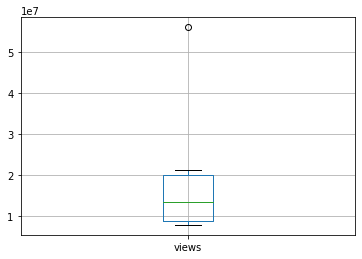

In [9]:
usDataDates.get_group('18.14.02').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

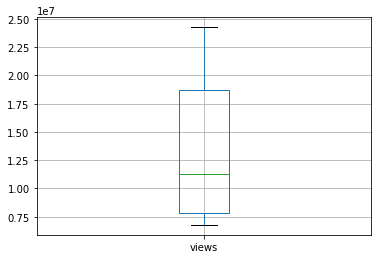

In [10]:
usDataDates.get_group('18.14.03').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

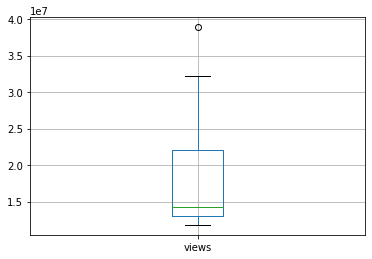

In [11]:
usDataDates.get_group('18.14.04').sort_values(by=['views'], ascending=False).head(10).boxplot(column='views')

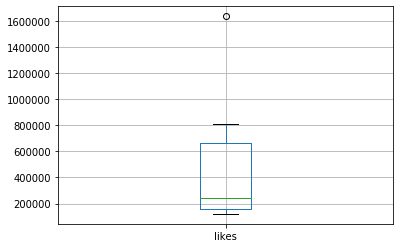

In [12]:
usDataDates.get_group('17.14.11').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

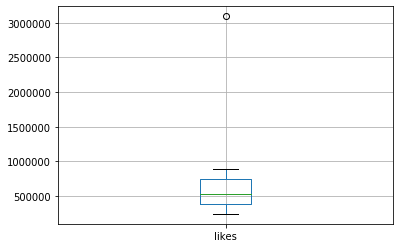

In [13]:
usDataDates.get_group('17.14.12').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

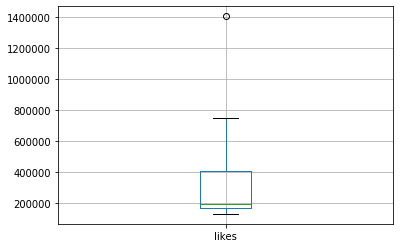

In [14]:
usDataDates.get_group('18.14.01').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

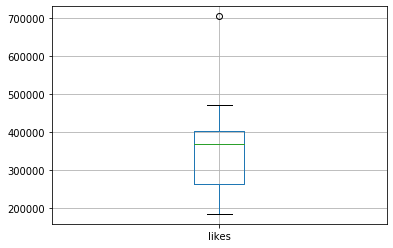

In [15]:
usDataDates.get_group('18.14.02').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

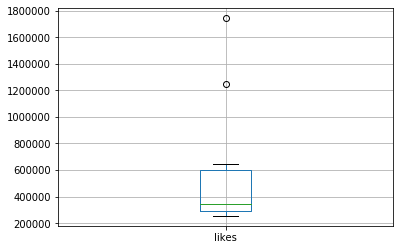

In [16]:
usDataDates.get_group('18.14.03').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

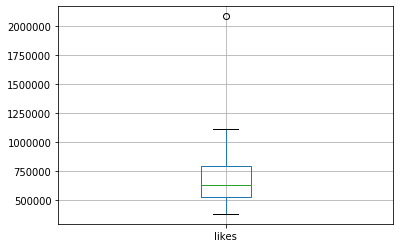

In [17]:
usDataDates.get_group('18.14.04').sort_values(by=['likes'], ascending=False).head(10).boxplot(column='likes')

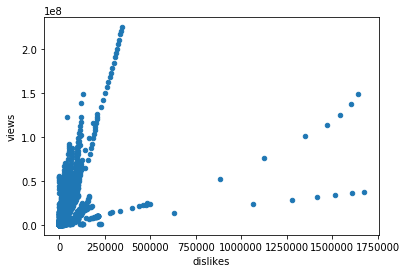

In [18]:
#plot dislikes verses other variables to try to find a trend
usData.sort_values(by=['dislikes'], ascending=False).plot.scatter(x='dislikes', y='views')

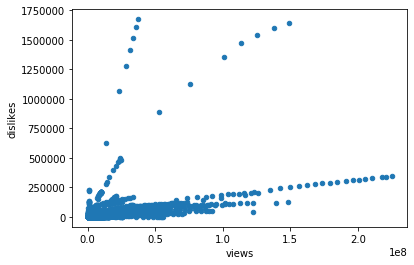

In [19]:
usData.sort_values(by=['views'], ascending=False).plot.scatter(x='views', y='dislikes')

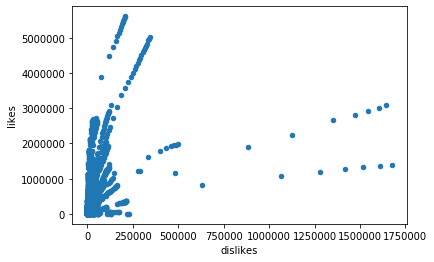

In [20]:
usData.sort_values(by=['dislikes'], ascending=False).plot.scatter(x='dislikes', y='likes')

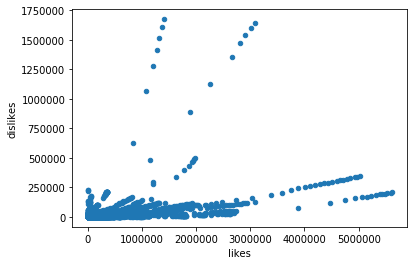

In [21]:
usData.sort_values(by=['likes'], ascending=False).plot.scatter(x='likes', y='dislikes')

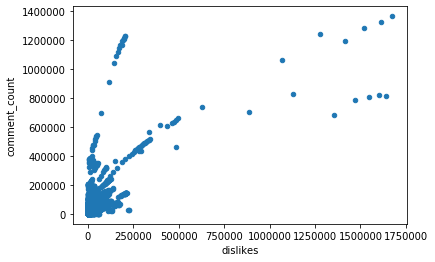

In [22]:
usData.sort_values(by=['dislikes'], ascending=False).plot.scatter(x='dislikes', y='comment_count')

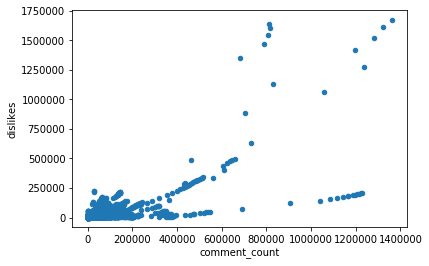

In [23]:
usData.sort_values(by=['dislikes'], ascending=False).plot.scatter(x='comment_count', y='dislikes')

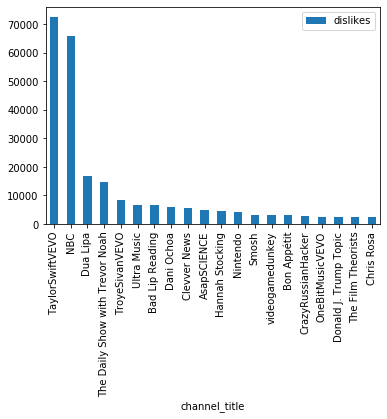

In [24]:
usDataDates.get_group('18.14.01').sort_values(by=['dislikes'], ascending=False).head(20).plot.bar(x='channel_title', y='dislikes')

In [25]:
usData2 = usData
usData2['rating'] = pd.qcut(usData.dislikes, q=2, labels=['good', 'bad'])
usData2.sort_values(by=['dislikes'], ascending=True).head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,rating
921,1x77e4XvqZ4,18.09.01,RC Jansen Strandbeest,Mike H,2015-01-08T21:02:08.000Z,[none],9046,45,0,4,https://i.ytimg.com/vi/1x77e4XvqZ4/default.jpg,False,False,False,NaN,People & Blogs,good
19095,Kn5UgGQukYQ,17.23.11,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,2016-10-14T21:14:51.000Z,"breaking bad,bryan cranston,malcom in the midd...",36137,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,Film & Animation,good
37150,_EMxJMU1dCo,18.08.03,GET READY WITH ME | Halo Beauty Launch Day,Tati,2018-03-02T18:00:04.000Z,"youtube,beauty,makeup,tutorial,review,tati,wes...",912549,0,0,0,https://i.ytimg.com/vi/_EMxJMU1dCo/default.jpg,True,True,False,"Unfortunately, I had to disable comments due t...",Howto & Style,good


In [26]:
usData2.rating.value_counts()

good    20454
bad     20447
Name: rating, dtype: int64

In [27]:
attributes = usData2.drop(['thumbnail_link', 'description', 'dislikes', 'tags', 'rating', 'category', 'publish_time', 'trending_date', 'video_id', 'title', 'channel_title'], axis=1)
target = usData2.rating

In [28]:
Tree = tree.DecisionTreeClassifier(max_depth=2)

In [29]:
Tree.fit(attributes,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

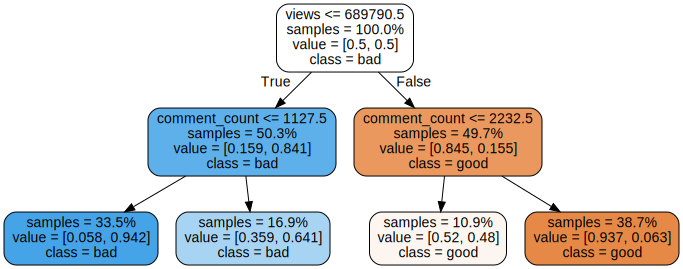

In [30]:
dot_data = tree.export_graphviz(Tree, out_file=None,
                                feature_names=attributes.columns,
                                class_names = ['good', 'bad'],
                                proportion=True,
                                impurity=False,
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)
graph.render('YouTube Dislikes')
graph

In [31]:
# usData2['predict'] = Tree.predict(attributes)
# incorrect = (usData2.rating != usData2.predict).sum()
# incorrect/usData2.shape[0]

In [32]:
df = pd.DataFrame(data={'views': 5, 'likes': 3, 'comment_count': 7, 'comments_disabled':False, 'ratings_disabled':False, 'video_error_or_removed': False}, index=[0])
Tree.predict(df)

array(['good'], dtype=object)

In [33]:
usData2['dislike_ratio'] = usData2.views / usData2.dislikes
usData2['dislike_rating'] = pd.qcut(usData.dislike_ratio, q=2, labels=['bad', 'good'])
usData2.head(5)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,rating,dislike_ratio,dislike_rating
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,bad,252.317599,bad
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,good,537.858696,bad
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,bad,181.181151,bad
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,good,908.119816,bad
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,bad,2472.459459,good


In [34]:
attributes = usData2.drop(['thumbnail_link', 'description', 'dislike_rating', 'dislike_ratio', 'dislikes', 'tags', 'rating', 'category', 'publish_time', 'trending_date', 'video_id', 'title', 'channel_title'], axis=1)
target = usData2.dislike_rating
attributes

,views,likes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,748374,57527,15954,False,False,False
1,98966,2486,532,False,False,False
2,321053,4451,895,False,False,False
3,197062,7250,456,False,False,False
4,2744430,115426,6541,False,False,False
...,...,...,...,...,...,...
40896,1324482,22413,1644,False,False,False
40897,1332252,22461,1648,False,False,False
40898,1340039,22504,1648,False,False,False
40899,1345086,22542,1649,False,False,False


In [35]:
Tree = tree.DecisionTreeClassifier(max_depth=2)

In [36]:
Tree.fit(attributes,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

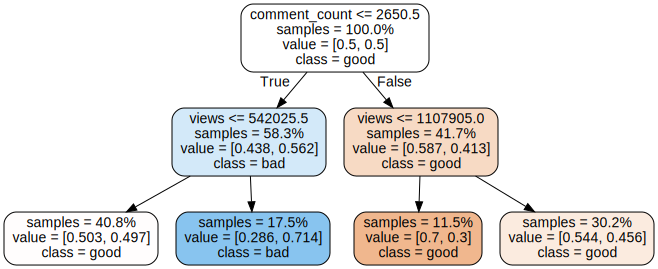

In [37]:
dot_data = tree.export_graphviz(Tree, out_file=None,
                                feature_names=attributes.columns,
                                class_names = ['good', 'bad'],
                                proportion=True,
                                impurity=False,
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)
graph.render('YouTube Dislikes')
graph

In [38]:
usData2['predict'] = Tree.predict(attributes)
incorrect = (usData2.dislike_rating != usData2.predict).sum()
incorrect/usData2.shape[0]

0.4251974279357473

In [39]:
usData2['like_dislike_ratio'] = usData2.likes / usData2.dislikes
usData2['like_dislike_rating'] = pd.qcut(usData.like_dislike_ratio, q=2, labels=['bad', 'good'])
usData2 = usData2.replace([np.inf, -np.inf], np.nan).dropna(how="any")
usData2.head(5)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,category,rating,dislike_ratio,dislike_rating,predict,like_dislike_ratio,like_dislike_rating
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,...,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,bad,252.317599,bad,bad,19.395482,bad
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,...,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,good,537.858696,bad,bad,13.510870,bad
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,...,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,bad,181.181151,bad,bad,2.511851,bad
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,...,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,good,908.119816,bad,bad,33.410138,good
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,...,False,False,I found this online dollar store called ShopMi...,People & Blogs,bad,2472.459459,good,bad,103.987387,good


In [40]:
attributes = usData2.drop(['thumbnail_link', 'description', 'dislike_rating', 'predict', 'dislike_ratio', 'dislikes', 'tags', 'rating', 'category', 'publish_time', 'trending_date', 'video_id', 'title', 'channel_title', 'like_dislike_rating', 'like_dislike_ratio'], axis=1)
target = usData2.like_dislike_rating
attributes

,views,likes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,748374,57527,15954,False,False,False
1,98966,2486,532,False,False,False
2,321053,4451,895,False,False,False
3,197062,7250,456,False,False,False
4,2744430,115426,6541,False,False,False
...,...,...,...,...,...,...
40896,1324482,22413,1644,False,False,False
40897,1332252,22461,1648,False,False,False
40898,1340039,22504,1648,False,False,False
40899,1345086,22542,1649,False,False,False


In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [43]:
Tree = tree.DecisionTreeClassifier()

In [44]:
TreeCV = GridSearchCV(Tree, param_grid=parameters, return_train_score = True)

In [45]:
TreeCV.fit(attributes,target)

C:\Users\black\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [46]:
TreeCV.best_params_

{'max_depth': 8}

In [47]:
error = pd.DataFrame()
error['depth'] = parameters['max_depth']
error['train error'] = 1 - TreeCV.cv_results_['mean_train_score']
error['test error'] = 1 - TreeCV.cv_results_['mean_test_score']
error

,depth,train error,test error
0,1,0.381977,0.385479
1,2,0.381977,0.385479
2,3,0.325949,0.346676
3,4,0.300456,0.347752
4,5,0.272573,0.299042
5,6,0.244978,0.283180
6,7,0.224963,0.269095
7,8,0.202985,0.259738
8,9,0.185435,0.265893
9,10,0.162656,0.272848


In [48]:
usData2 = usData
usData2['rating'] = pd.qcut(usData.dislikes, q=2, labels=['good', 'bad'])
usData2.sort_values(by=['dislikes'], ascending=True).head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,ratings_disabled,video_error_or_removed,description,category,rating,dislike_ratio,dislike_rating,predict,like_dislike_ratio,like_dislike_rating
921,1x77e4XvqZ4,18.09.01,RC Jansen Strandbeest,Mike H,2015-01-08T21:02:08.000Z,[none],9046,45,0,4,...,False,False,NaN,People & Blogs,good,inf,good,bad,inf,good
19095,Kn5UgGQukYQ,17.23.11,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,2016-10-14T21:14:51.000Z,"breaking bad,bryan cranston,malcom in the midd...",36137,0,0,0,...,True,False,The Hudson Union www.hudsonunionsociety.com is...,Film & Animation,good,inf,good,bad,NaN,NaN
37150,_EMxJMU1dCo,18.08.03,GET READY WITH ME | Halo Beauty Launch Day,Tati,2018-03-02T18:00:04.000Z,"youtube,beauty,makeup,tutorial,review,tati,wes...",912549,0,0,0,...,True,False,"Unfortunately, I had to disable comments due t...",Howto & Style,good,inf,good,good,NaN,NaN


In [49]:
usData2 = usData2.replace([np.inf, -np.inf], np.nan).dropna(how="any")
attributes = usData2.drop(['thumbnail_link', 'description', 'dislikes', 'like_dislike_rating', 'dislike_rating', 'dislike_rating', 'predict', 'tags', 'rating', 'category', 'publish_time', 'trending_date', 'video_id', 'title', 'channel_title'], axis=1)
target = usData2.rating


In [50]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}
Tree = tree.DecisionTreeClassifier()
TreeCV = GridSearchCV(Tree, param_grid=parameters, return_train_score = True)

In [51]:
TreeCV.fit(attributes,target)

C:\Users\black\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [52]:
TreeCV.best_params_

{'max_depth': 10}

In [53]:
error = pd.DataFrame()
error['depth'] = parameters['max_depth']
error['train error'] = 1 - TreeCV.cv_results_['mean_train_score']
error['test error'] = 1 - TreeCV.cv_results_['mean_test_score']
error

,depth,train error,test error
0,1,0.155838,0.169948
1,2,0.155838,0.169948
2,3,0.076092,0.083110
3,4,0.052138,0.062245
4,5,0.026594,0.033925
5,6,0.015298,0.023792
6,7,0.005917,0.014185
7,8,0.002402,0.011058
8,9,0.000638,0.009907
9,10,0.000100,0.009757


In [54]:
from sklearn.cluster import KMeans

In [55]:
usData3 = usData2
attributes = usData3[['likes', 'dislikes']]
attributes.head(3)

,likes,dislikes
0,57527,2966
1,2486,184
2,4451,1772


In [56]:
km = KMeans(n_clusters=2)
km.fit(attributes)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [57]:
lbls = km.predict(attributes)
lbls

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
colors = np.array(['blue','green','red','cyan','magenta','yellow','black', 'purple', 'grey', 'orange'])
usData3['clusters'] = colors[lbls]
usData3.head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,...,video_error_or_removed,description,category,rating,dislike_ratio,dislike_rating,predict,like_dislike_ratio,like_dislike_rating,clusters
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,bad,252.317599,bad,bad,19.395482,bad,blue
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,...,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,good,537.858696,bad,bad,13.510870,bad,blue
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,...,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,bad,181.181151,bad,bad,2.511851,bad,blue


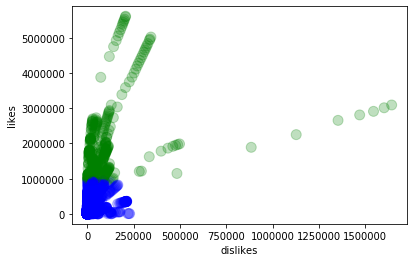

In [59]:
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

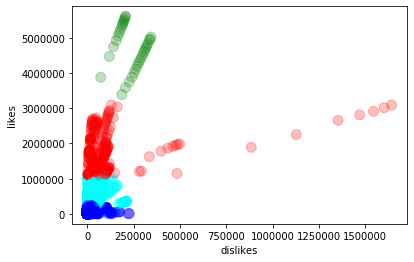

In [60]:
km = KMeans(n_clusters=4)
km.fit(attributes)
lbls = km.predict(attributes)
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

In [61]:
usData3['likes'] = (usData3['likes']-usData3['likes'].mean())/usData3['likes'].std()
usData3['dislikes'] = (usData3['dislikes']-usData3['dislikes'].mean())/usData3['dislikes'].std()
attributes = usData3[['dislikes', 'likes']]
attributes

,dislikes,likes
0,-0.024640,-0.077038
1,-0.144092,-0.315665
2,-0.075907,-0.307146
3,-0.142675,-0.295011
4,-0.104332,0.173981
...,...,...
40896,-0.125886,-0.229273
40897,-0.125801,-0.229065
40898,-0.125586,-0.228878
40899,-0.125586,-0.228713


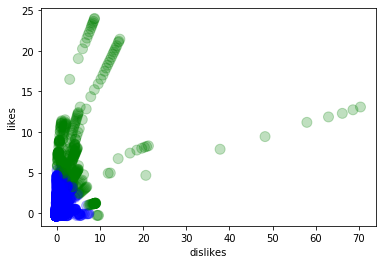

In [62]:
km = KMeans(n_clusters=2)
km.fit(attributes)
lbls = km.predict(attributes)
lbls
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

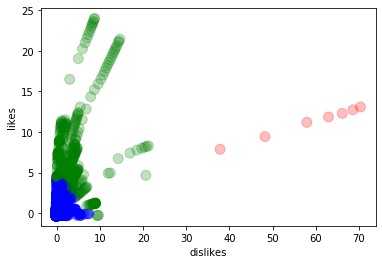

In [63]:
km = KMeans(n_clusters=3)
km.fit(attributes)
lbls = km.predict(attributes)
lbls
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

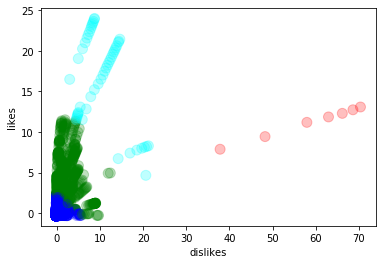

In [64]:
km = KMeans(n_clusters=4)
km.fit(attributes)
lbls = km.predict(attributes)
lbls
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

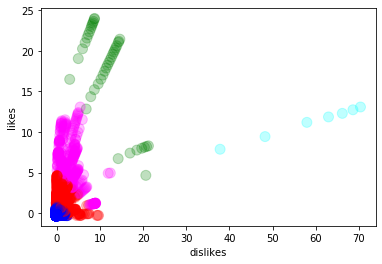

In [65]:
km = KMeans(n_clusters=5)
km.fit(attributes)
lbls = km.predict(attributes)
lbls
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

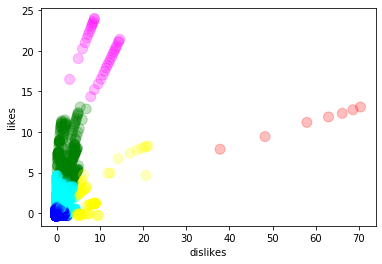

In [66]:
km = KMeans(n_clusters=6)
km.fit(attributes)
lbls = km.predict(attributes)
lbls
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

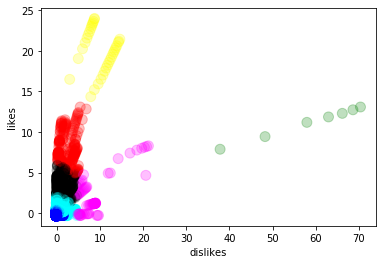

In [67]:
km = KMeans(n_clusters=7)
km.fit(attributes)
lbls = km.predict(attributes)
lbls
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

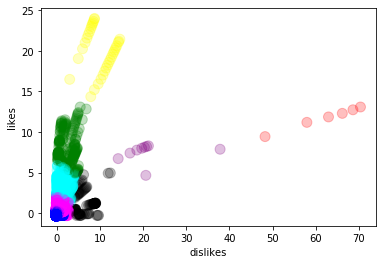

In [68]:
km = KMeans(n_clusters=8)
km.fit(attributes)
lbls = km.predict(attributes)
lbls
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

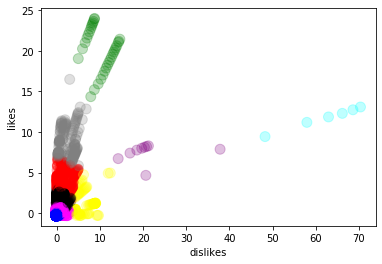

In [69]:
km = KMeans(n_clusters=9)
km.fit(attributes)
lbls = km.predict(attributes)
lbls
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)

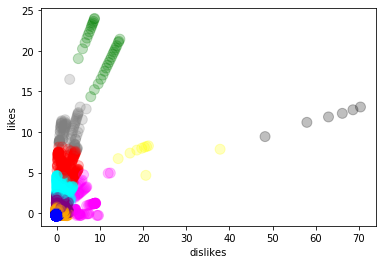

In [70]:
km = KMeans(n_clusters=10)
km.fit(attributes)
lbls = km.predict(attributes)
lbls
usData3['clusters'] = colors[lbls]
usData3.plot.scatter(x='dislikes', y='likes', c=usData3.clusters, s=100, alpha=0.25)